<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Finals/Module%2011/HOA%2011.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by: Angelo Luis C. Cu

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cervical_cancer_risk_factors = fetch_ucirepo(id=383)

# data (as pandas dataframes)
X = cervical_cancer_risk_factors.data.features
y = cervical_cancer_risk_factors.data.targets

# metadata
print(cervical_cancer_risk_factors.metadata)

# variable information
print(cervical_cancer_risk_factors.variables)

{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [4]:
cervical_cancer = pd.concat([X, y], axis = 1)
cervical_cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Data Wrangling

In [6]:
# checks for duplicate values
cervical_cancer[cervical_cancer.duplicated()].shape[0]

23

In [7]:
# removes duplicate rows
cervical_cancer.drop_duplicates(inplace=True)

In [8]:
# checking for missing values
cervical_cancer.info()
# no. of sexual partners- STDs:HPV,
# STD time since first and last diagnosis have missing values

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-null  

In [9]:
# changes spaces to underscores for easier column access
cervical_cancer.columns = [column.replace(' ', '_') for column in cervical_cancer.columns]
cervical_cancer.columns = [column.strip('_') for column in cervical_cancer.columns]
cervical_cancer

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_(years),Smokes_(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives_(years),IUD,...,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [28]:
# I decided to get the mean by age to fill NaN values in column 1 to 3
cervical_cancer['Number_of_sexual_partners'] = cervical_cancer.groupby('Age')['Number_of_sexual_partners'].transform(lambda x: x.fillna(x.mean()))
cervical_cancer['First_sexual_intercourse'] = cervical_cancer.groupby('Age')['First_sexual_intercourse'].transform(lambda x: x.fillna(x.mean()))
cervical_cancer['Num_of_pregnancies'] = cervical_cancer.groupby('Age')['Num_of_pregnancies'].transform(lambda x: x.fillna(x.mean()))
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number_of_sexual_partners           835 non-null    float64
 2   First_sexual_intercourse            835 non-null    float64
 3   Num_of_pregnancies                  835 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes_(years)                      822 non-null    float64
 6   Smokes_(packs/year)                 822 non-null    float64
 7   Hormonal_Contraceptives             732 non-null    float64
 8   Hormonal_Contraceptives_(years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD_(years)                         723 non-null    float64
 11  STDs                                735 non-null  

In [31]:
# for smokes (columns 4-6)
cervical_cancer.Smokes.value_counts()

Smokes
0.0    699
1.0    123
Name: count, dtype: int64

In [32]:
# since most of the data is at 0, I decided to fill the NaN values with 0 (false / do not smoke)
cervical_cancer.iloc[:, 4:7] = cervical_cancer.iloc[:, 4:7].fillna(0)
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number_of_sexual_partners           835 non-null    float64
 2   First_sexual_intercourse            835 non-null    float64
 3   Num_of_pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes_(years)                      835 non-null    float64
 6   Smokes_(packs/year)                 835 non-null    float64
 7   Hormonal_Contraceptives             732 non-null    float64
 8   Hormonal_Contraceptives_(years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD_(years)                         723 non-null    float64
 11  STDs                                735 non-null  

In [33]:
# for hormonal contraceptives (columns 7-8)
cervical_cancer['Hormonal_Contraceptives'].value_counts()

Hormonal_Contraceptives
1.0    477
0.0    255
Name: count, dtype: int64

In [36]:
# since there is still a significant amount of data in 1,
# I decided to fill the NaN values for column 7 with 1 (true)
cervical_cancer['Hormonal_Contraceptives'].fillna(1, inplace=True)
cervical_cancer['Hormonal_Contraceptives'].info()

<class 'pandas.core.series.Series'>
Index: 835 entries, 0 to 857
Series name: Hormonal_Contraceptives
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [44]:
# for column 8, the mean per age would be filled since I know that the hormonal contraceptives row are linked
cervical_cancer['Hormonal_Contraceptives_(years)'] = cervical_cancer.groupby('Age')['Hormonal_Contraceptives_(years)'].transform(lambda x: x.fillna(x.mean()))
cervical_cancer['Hormonal_Contraceptives_(years)'].info()

<class 'pandas.core.series.Series'>
Index: 835 entries, 0 to 857
Series name: Hormonal_Contraceptives_(years)
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [45]:
# for IUDs (columns 9-10)
cervical_cancer.IUD.value_counts()

IUD
0.0    640
1.0     83
Name: count, dtype: int64

In [46]:
# since most of the data is 0, I decided to fill the NaN values with 0 (false)
cervical_cancer.IUD.fillna(0, inplace=True)
cervical_cancer.IUD.info()

<class 'pandas.core.series.Series'>
Index: 835 entries, 0 to 857
Series name: IUD
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [48]:
# for column 10, I decided to fill them with 0 already since I know that the STD rows are linked to column 11
cervical_cancer.iloc[:, 10] = cervical_cancer.iloc[:, 10].fillna(0)
cervical_cancer['IUD_(years)'].info()

<class 'pandas.core.series.Series'>
Index: 835 entries, 0 to 857
Series name: IUD_(years)
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [49]:
# for STDs (columns 11-24)
cervical_cancer.STDs.value_counts()

STDs
0.0    656
1.0     79
Name: count, dtype: int64

In [50]:
# since most of the data is 0, I decided to fill the NaN values with 0 (false)
cervical_cancer.STDs.fillna(0, inplace=True)
cervical_cancer.STDs.info()

<class 'pandas.core.series.Series'>
Index: 835 entries, 0 to 857
Series name: STDs
Non-Null Count  Dtype  
--------------  -----  
835 non-null    float64
dtypes: float64(1)
memory usage: 13.0 KB


In [51]:
# for columns 12-24, I decided to fill them with 0 already since I know that the STD rows are linked to column 11
cervical_cancer.iloc[:, 12:25] = cervical_cancer.iloc[:, 12:25].fillna(0)
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number_of_sexual_partners           835 non-null    float64
 2   First_sexual_intercourse            835 non-null    float64
 3   Num_of_pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes_(years)                      835 non-null    float64
 6   Smokes_(packs/year)                 835 non-null    float64
 7   Hormonal_Contraceptives             835 non-null    float64
 8   Hormonal_Contraceptives_(years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD_(years)                         835 non-null    float64
 11  STDs                                835 non-null  

In [52]:
# since the data is already filled, I decided to move on to columns 26-27
# for STD time since first and last diagnosis, it would still base on the STD column (column 11)
# if the data from column 11 is 0, the data would be filled with 0
cervical_cancer['STDs:_Time_since_first_diagnosis'] = cervical_cancer.apply(lambda row: 0 if pd.isnull(row['STDs:_Time_since_first_diagnosis']) and row['STDs'] == 0 else row['STDs:_Time_since_first_diagnosis'], axis=1)
cervical_cancer['STDs:_Time_since_last_diagnosis'] = cervical_cancer.apply(lambda row: 0 if pd.isnull(row['STDs:_Time_since_last_diagnosis']) and row['STDs'] == 0 else row['STDs:_Time_since_last_diagnosis'], axis=1)
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number_of_sexual_partners           835 non-null    float64
 2   First_sexual_intercourse            835 non-null    float64
 3   Num_of_pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes_(years)                      835 non-null    float64
 6   Smokes_(packs/year)                 835 non-null    float64
 7   Hormonal_Contraceptives             835 non-null    float64
 8   Hormonal_Contraceptives_(years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD_(years)                         835 non-null    float64
 11  STDs                                835 non-null  

In [53]:
# else the data would be filled with the mean per age
cervical_cancer['STDs:_Time_since_first_diagnosis'] = cervical_cancer.groupby('Age')['STDs:_Time_since_first_diagnosis'].transform(lambda x: x.fillna(x.mean()))
cervical_cancer['STDs:_Time_since_last_diagnosis'] = cervical_cancer.groupby('Age')['STDs:_Time_since_last_diagnosis'].transform(lambda x: x.fillna(x.mean()))
cervical_cancer.info()
# all missing data are handled

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number_of_sexual_partners           835 non-null    float64
 2   First_sexual_intercourse            835 non-null    float64
 3   Num_of_pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes_(years)                      835 non-null    float64
 6   Smokes_(packs/year)                 835 non-null    float64
 7   Hormonal_Contraceptives             835 non-null    float64
 8   Hormonal_Contraceptives_(years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD_(years)                         835 non-null    float64
 11  STDs                                835 non-null  

Exploratory Data Analysis

In [54]:
cervical_cancer.describe()
"""
According to this data, the average age is 27
On average, a person has 3 sexual partners,
They experienced their first sexual intercourse at 17
And females have an average of 2 pregancies
"""

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_(years),Smokes_(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives_(years),IUD,...,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,...,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.554967,17.022322,2.294242,0.147305,1.234329,0.458571,0.694611,2.241796,0.099401,...,0.530966,0.502952,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.653366,2.806011,1.422331,0.354623,4.111264,2.239363,0.460848,3.591672,0.299379,...,2.421721,2.329587,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# separating by categories (smokes, hormonal contraceptives, IUDs, STDs, and Dx)
# as per the documentation, the target variables are the last 4 columns

# getting the target variables
target_variables = cervical_cancer.iloc[:, 32:35]

# getting the categories
c_smokes = cervical_cancer.iloc[:, 4:7]
c_hormonal_contraceptives = cervical_cancer.iloc[:, 7:9]
c_iuds = cervical_cancer.iloc[:, 9:11]
c_stds = cervical_cancer.iloc[:, 11:28]
c_dx = cervical_cancer.iloc[:, 28:32]

Text(0.5, 0.98, 'Smokes Heatmap')

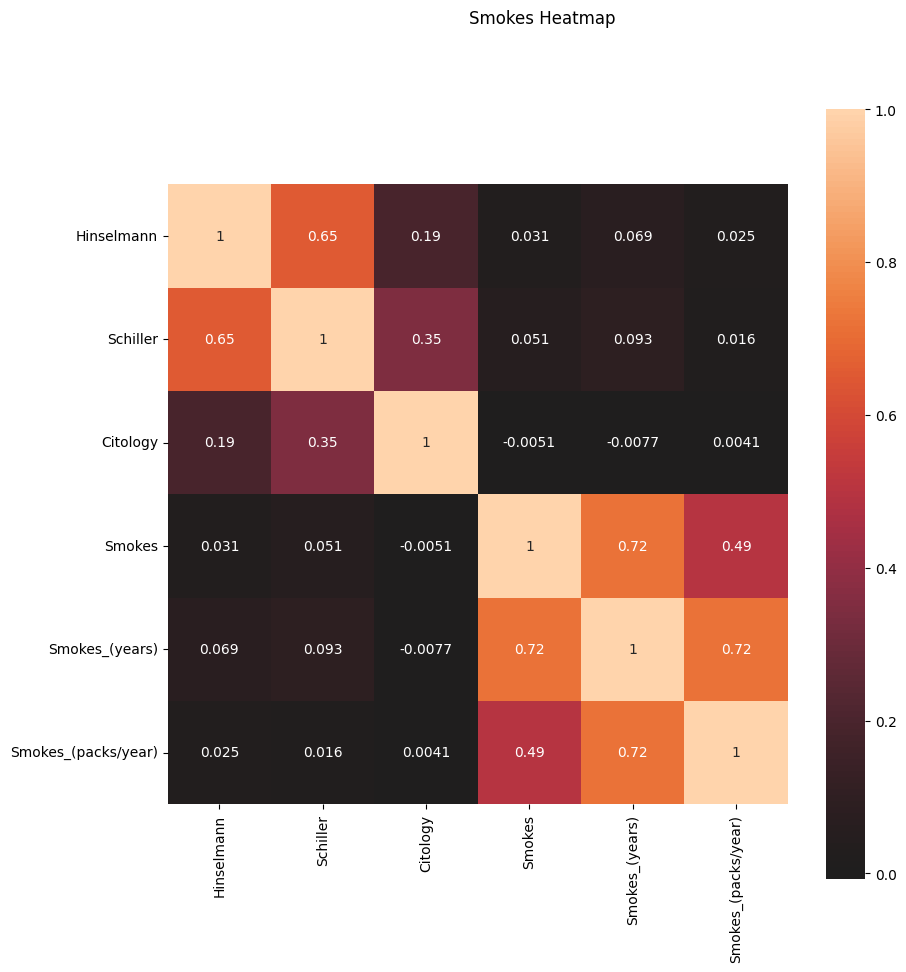

In [63]:
# getting the heatmap per category
plt.figure(figsize=(10,10))
sns.heatmap(
    pd.concat([target_variables, c_smokes], axis = 1).corr(),
    annot=True, center=0, square=True
)
plt.suptitle('Smokes Heatmap')

Text(0.5, 0.98, 'Hormonal Contraceptives Heatmap')

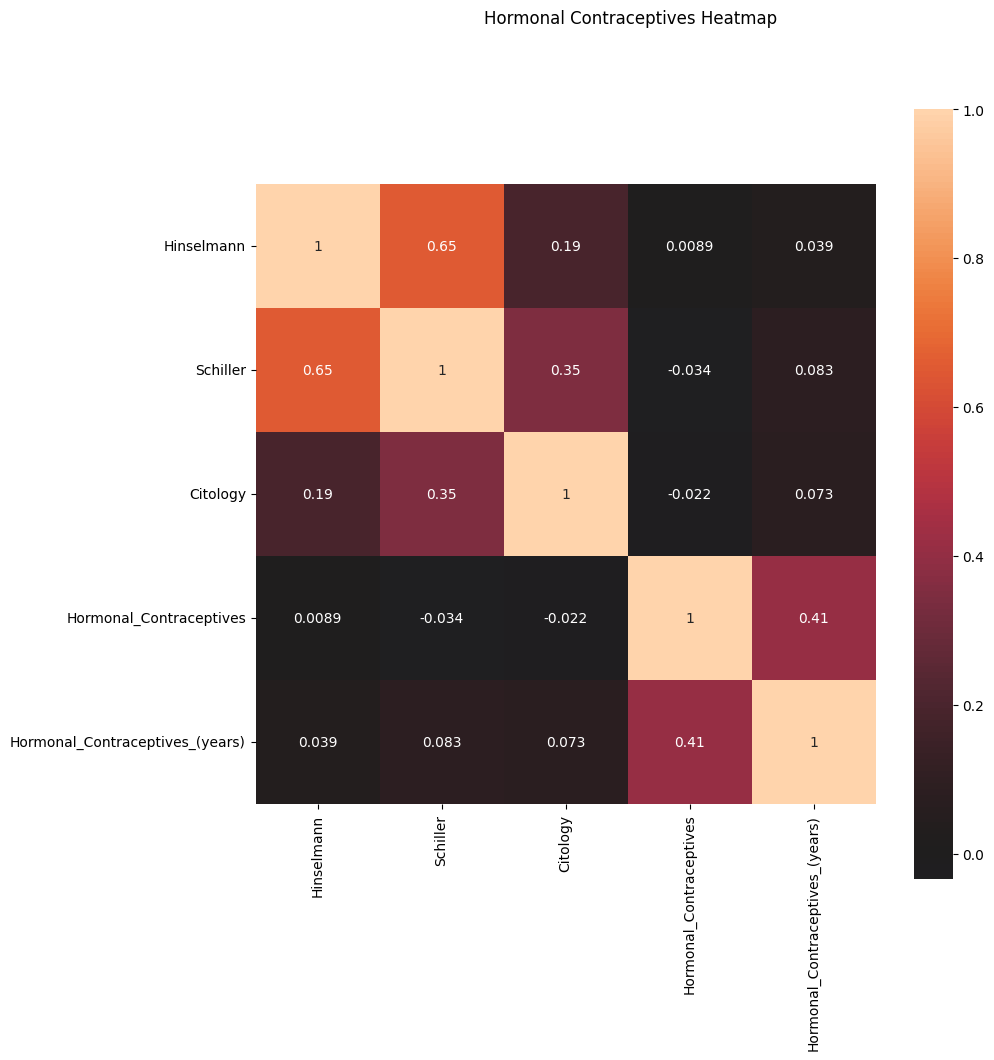

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(
    pd.concat([target_variables, c_hormonal_contraceptives], axis = 1).corr(),
    annot=True, center=0, square=True
)
plt.suptitle('Hormonal Contraceptives Heatmap')

Text(0.5, 0.98, 'IUDs Heatmap')

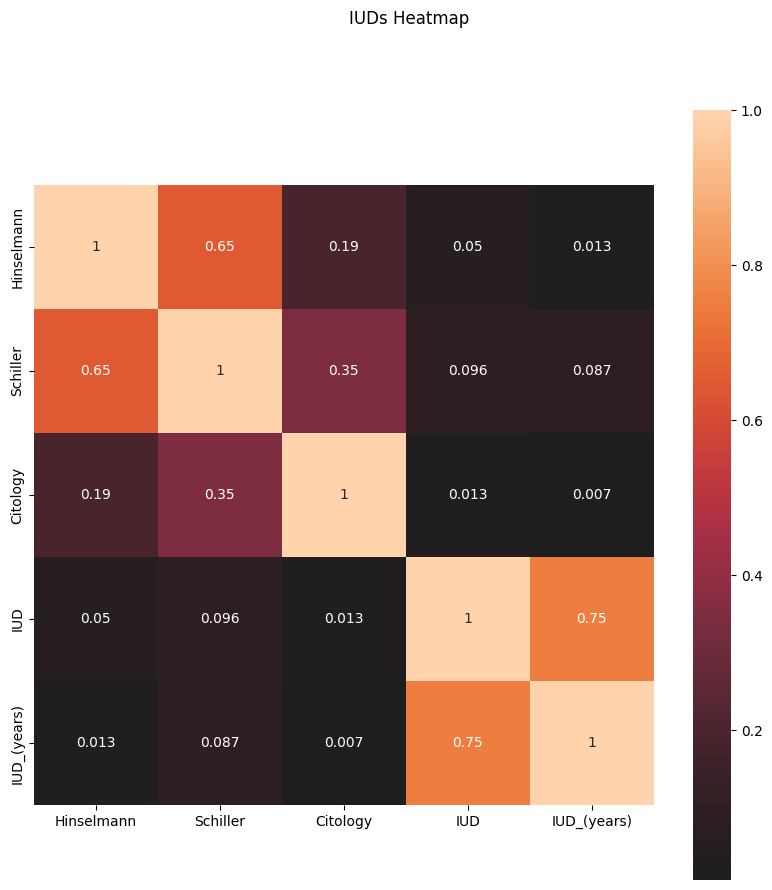

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(
    pd.concat([target_variables, c_iuds], axis = 1).corr(),
    annot=True, center=0, square=True
)
plt.suptitle('IUDs Heatmap')

Text(0.5, 0.98, 'STDs Heatmap')

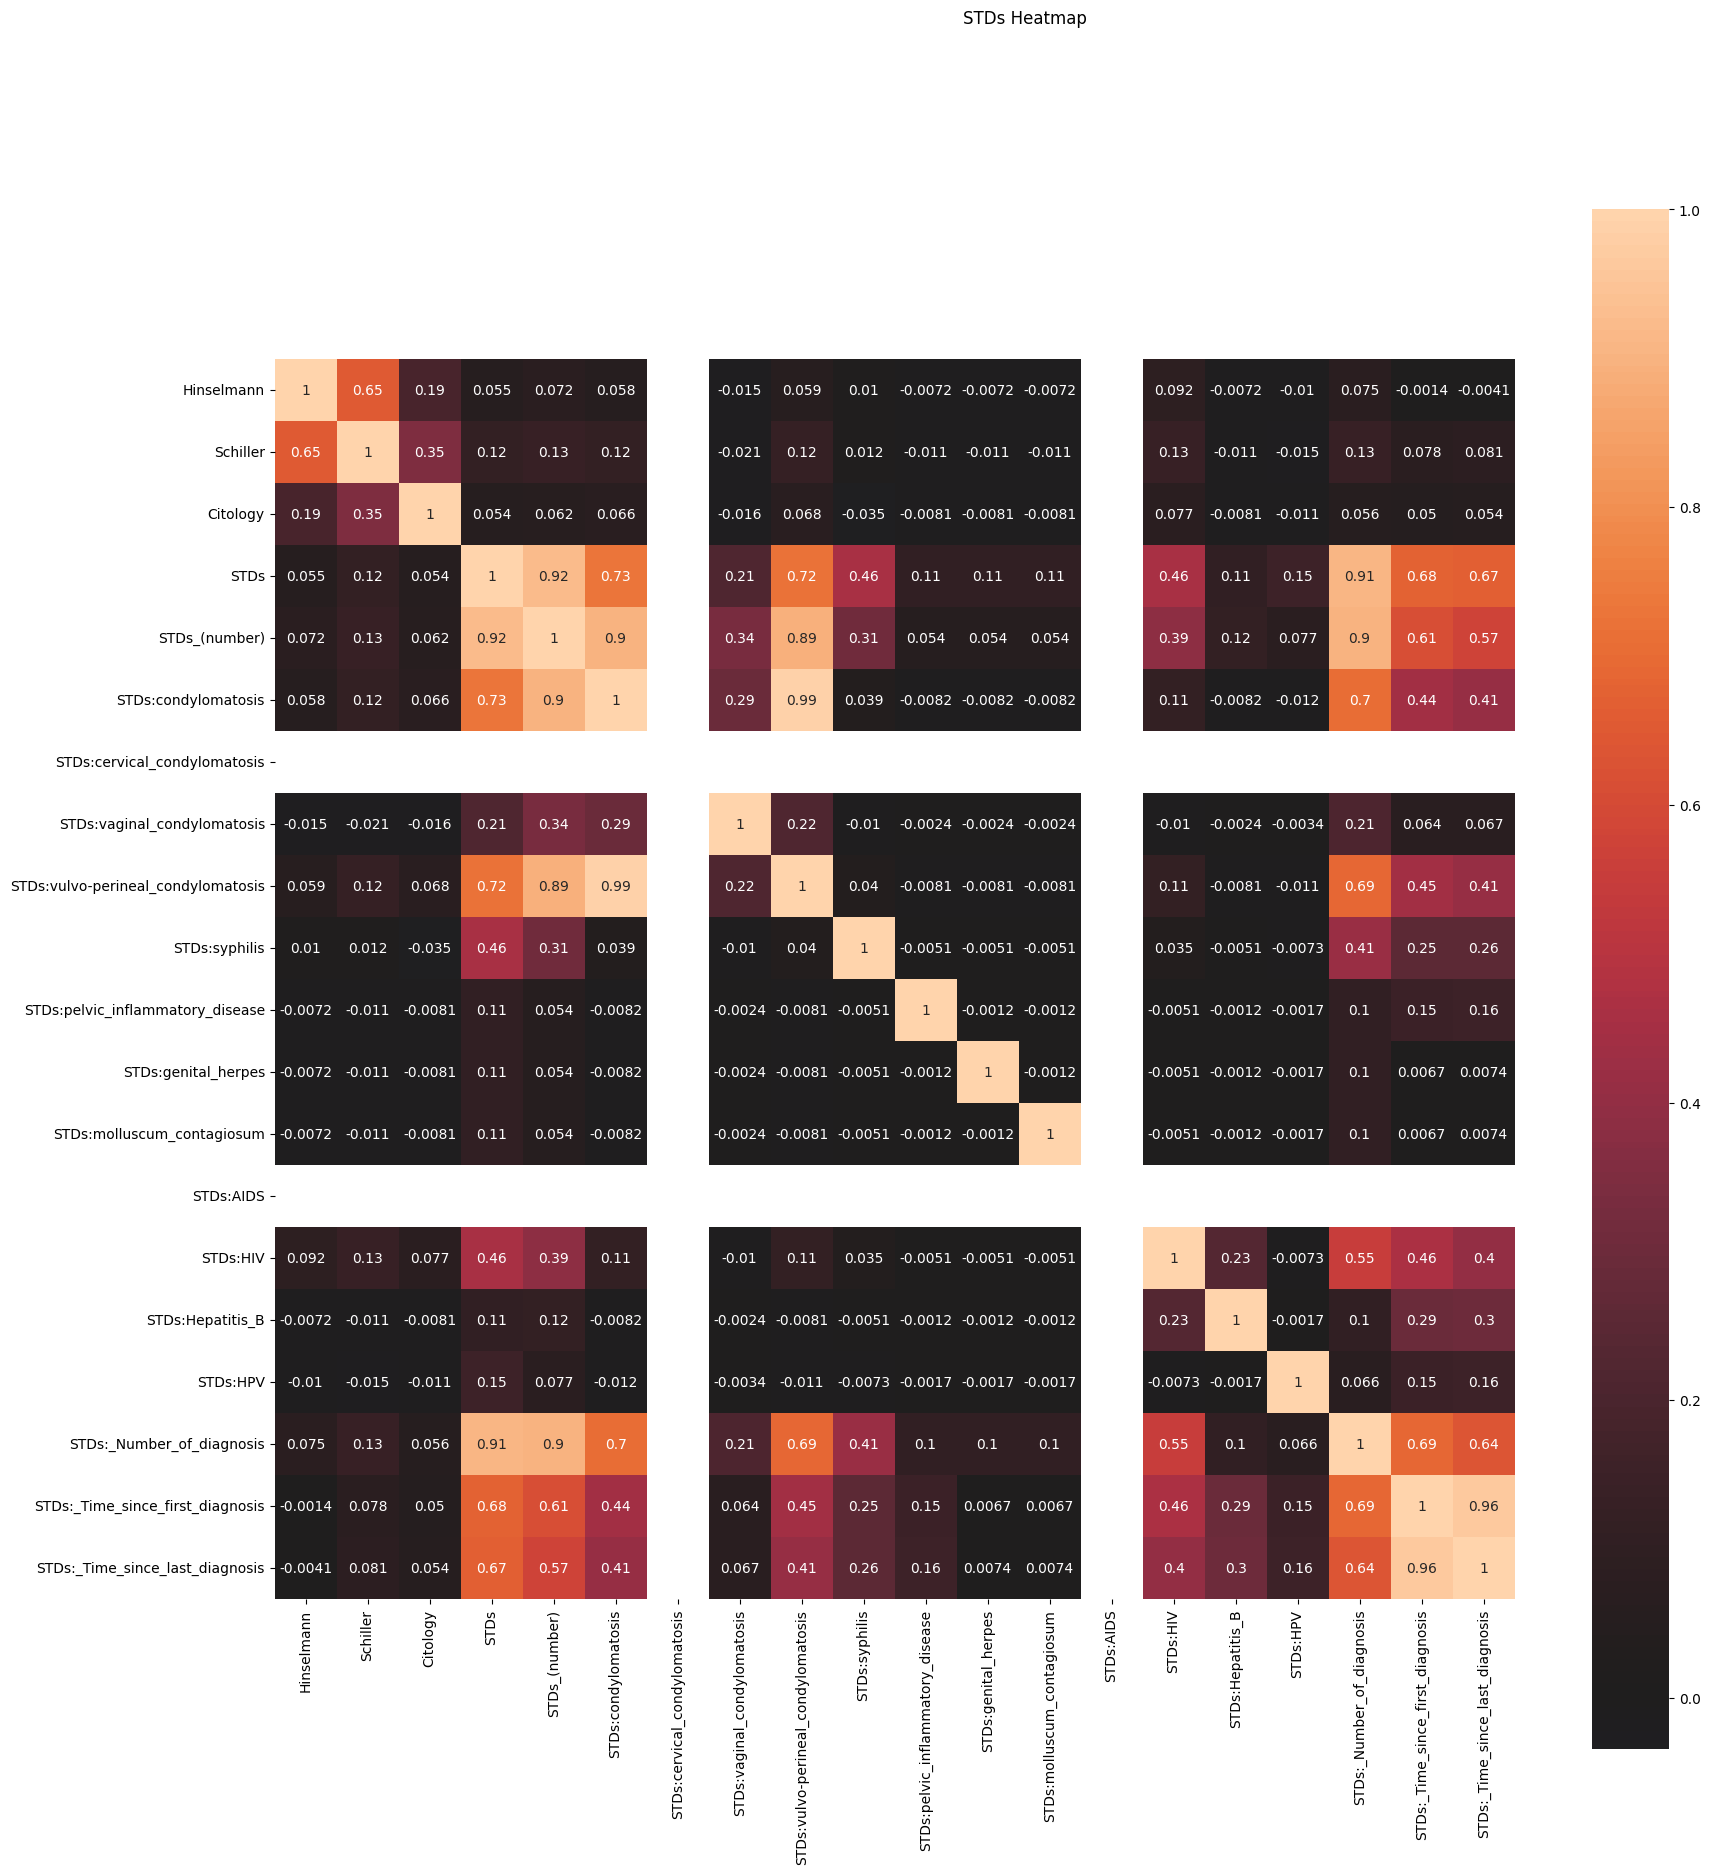

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(
    pd.concat([target_variables, c_stds], axis = 1).corr(),
    annot=True, center=0, square=True
)
plt.suptitle('STDs Heatmap')
# AIDS and Cervical Condylomatosis are white since all values are 0

Text(0.5, 0.98, 'Dx Heatmap')

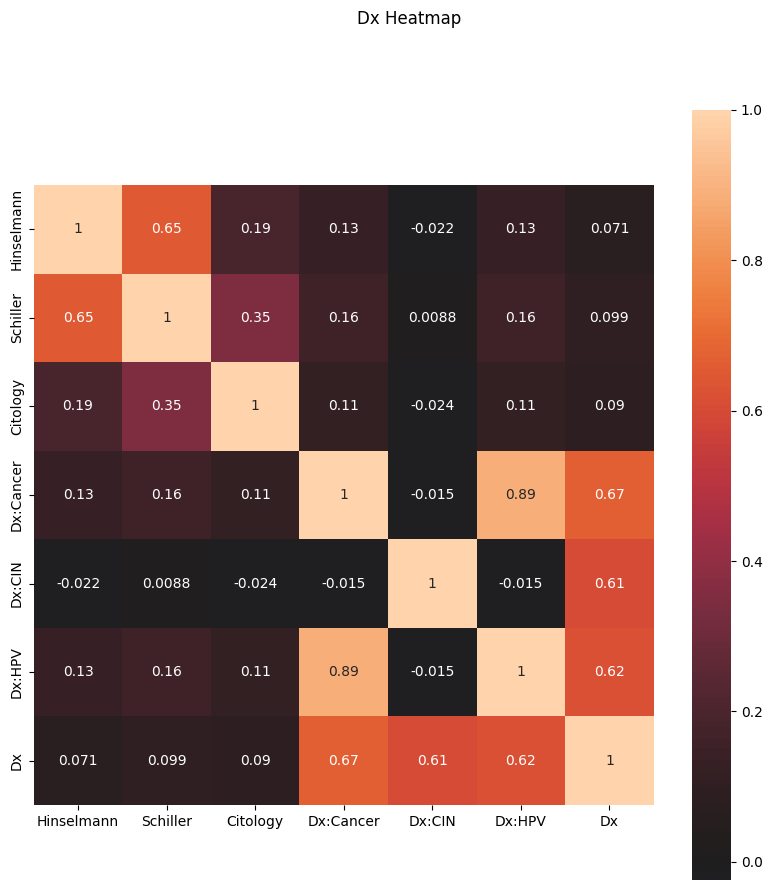

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(
    pd.concat([target_variables, c_dx], axis = 1).corr(),
    annot=True, center=0, square=True
)
plt.suptitle('Dx Heatmap')

Logistic Regression

In [82]:
# creating the X and Y arrays
X = cervical_cancer.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)
y = cervical_cancer['Hinselmann'] # Only Hinselmann would be used as dependent variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
X_train.shape, X_test.shape

((668, 32), (167, 32))

In [84]:
# Performing Feature Scaling
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])
X_train.describe()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes_(years),Smokes_(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives_(years),IUD,...,STDs:HIV,STDs:Hepatitis_B,STDs:HPV,STDs:_Number_of_diagnosis,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.209966,0.059991,0.318293,0.225689,0.157186,0.034262,0.012725,0.697605,0.077138,0.103293,...,0.023952,0.001497,0.002994,0.028443,0.022425,0.020833,0.025449,0.007485,0.025449,0.028443
std,0.123068,0.065075,0.125395,0.135558,0.364248,0.108684,0.061004,0.459640,0.122441,0.304570,...,0.153015,0.038691,0.054677,0.101739,0.107815,0.102407,0.157603,0.086256,0.157603,0.166360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.121212,0.037037,0.227273,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.196970,0.037037,0.318182,0.200000,0.000000,0.000000,0.000000,1.000000,0.030115,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.287879,0.074074,0.363636,0.300000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Training a Logistic Regression Model
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [87]:
# Predicting next results for TEST variables
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
# Getting probability of getting 0
logreg.predict_proba(X_test)[:,0]
# it can be noticed that all the decimals are >0.9,
# which means that there is a very high likelihood of getting 0

array([0.96499774, 0.96812193, 0.96178213, 0.955815  , 0.90170716,
       0.97202728, 0.95733515, 0.97822406, 0.96974261, 0.95380856,
       0.78285408, 0.97282591, 0.96213718, 0.97139767, 0.95349241,
       0.95400283, 0.9617409 , 0.96660061, 0.9693478 , 0.95215969,
       0.93983049, 0.93778046, 0.96555495, 0.97014354, 0.97156259,
       0.94923841, 0.968736  , 0.95877157, 0.97493375, 0.96534649,
       0.92624292, 0.96636051, 0.95537433, 0.93973728, 0.9219655 ,
       0.96566973, 0.97117451, 0.95803919, 0.97901675, 0.95297406,
       0.95129823, 0.96199643, 0.95450791, 0.95959901, 0.94785386,
       0.95687697, 0.90279063, 0.95310214, 0.97246285, 0.96201477,
       0.96626321, 0.96506751, 0.92266776, 0.96539549, 0.95784011,
       0.94706479, 0.96207725, 0.967493  , 0.9710381 , 0.9535819 ,
       0.97463454, 0.9270629 , 0.96905479, 0.95194204, 0.95569159,
       0.96546064, 0.9485952 , 0.97270511, 0.96905738, 0.96232778,
       0.96933687, 0.96894982, 0.94925526, 0.96278429, 0.97107

In [92]:
# getting probabilty of getting 1
logreg.predict_proba(X_test)[:,1]
# it can be noticed that most of the decimals are < 0.09,
# which means that there is a very low likelihood of getting 1

array([0.03500226, 0.03187807, 0.03821787, 0.044185  , 0.09829284,
       0.02797272, 0.04266485, 0.02177594, 0.03025739, 0.04619144,
       0.21714592, 0.02717409, 0.03786282, 0.02860233, 0.04650759,
       0.04599717, 0.0382591 , 0.03339939, 0.0306522 , 0.04784031,
       0.06016951, 0.06221954, 0.03444505, 0.02985646, 0.02843741,
       0.05076159, 0.031264  , 0.04122843, 0.02506625, 0.03465351,
       0.07375708, 0.03363949, 0.04462567, 0.06026272, 0.0780345 ,
       0.03433027, 0.02882549, 0.04196081, 0.02098325, 0.04702594,
       0.04870177, 0.03800357, 0.04549209, 0.04040099, 0.05214614,
       0.04312303, 0.09720937, 0.04689786, 0.02753715, 0.03798523,
       0.03373679, 0.03493249, 0.07733224, 0.03460451, 0.04215989,
       0.05293521, 0.03792275, 0.032507  , 0.0289619 , 0.0464181 ,
       0.02536546, 0.0729371 , 0.03094521, 0.04805796, 0.04430841,
       0.03453936, 0.0514048 , 0.02729489, 0.03094262, 0.03767222,
       0.03066313, 0.03105018, 0.05074474, 0.03721571, 0.02892

In [90]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9581


In [93]:
# Predicting next results for TRAIN variables
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9581


In [95]:
# Checking for overfitting and underfitting
# getting set scores

print('Training set score: {0:0.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {0:0.4f}'.format(logreg.score(X_test, y_test)))
# Since the set score are the same, there is not overfitting

Training set score: 0.9581
Test set score: 0.9581


In [96]:
# increasing the C to 100
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [97]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))
# It can be noticed that the set score became higher in the training set but lower on the test set

Training set score: 0.9626
Test set score: 0.9521


In [98]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [99]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))
# It can be noticed that there is no difference between a C of 1 and 0.01

Training set score: 0.9581
Test set score: 0.9581


In [100]:
# Comparing model accuracy with null accuracy
y_test.value_counts()

Hinselmann
0    160
1      7
Name: count, dtype: int64

In [101]:
null_accuracy = (160/167)
print('Null accuracy score: {:.4f}'.format(null_accuracy))
# It can be seen that the null accuracy score is the same as the training set score

Null accuracy score: 0.9581


In [104]:
# Creating an displaying a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# This shows that the model created 160 correct predictions and 7 incorrect predictions

Confusion matrix

 [[160   0]
 [  7   0]]

True Positives(TP) =  160

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  7


<Axes: >

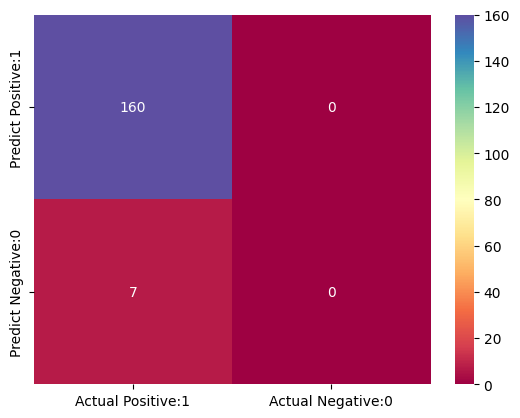

In [112]:
# Visualizing the confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

In [107]:
# Creates a classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       160
           1       0.00      0.00      0.00         7

    accuracy                           0.96       167
   macro avg       0.48      0.50      0.49       167
weighted avg       0.92      0.96      0.94       167



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
# Gets the classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {:.4f}'.format(classification_accuracy))

Classification accuracy: 0.9581


In [113]:
# Gets classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: {:.4f}'.format(classification_error))
# It can be seen that the classification accuracy is high while the error is low

Classification error: 0.0419


In [114]:
# Gets precision score
precision = TP / float(TP + FP)
print('Precision: {:.4f}'.format(precision))
# The result is a perfect precision score

Precision: 1.0000


In [115]:
# Gets Recall rate
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {:.4f}'.format(recall))

Recall or Sensitivity: 0.9581


In [118]:
# Gets False Positive rate
false_positive_rate = FP / float(FP+TN)
print('False Positive: {:.4f}'.format(false_positive_rate))
# Error is encountered as FP is 0

False Positive: nan


<ipython-input-118-648a66821cfc>:2: RuntimeWarning: invalid value encountered in divide
  false_positive_rate = FP / float(FP+TN)


In [119]:
# Gets Specificity rate
specificity = TN / (TN + FP)
print('Specificity: {:.4f}'.format(specificity))
# Error is encountered as TN is 0

Specificity: nan


<ipython-input-119-c484c783968f>:2: RuntimeWarning: invalid value encountered in scalar divide
  specificity = TN / (TN + FP)


Text(0, 0.5, 'Frequency')

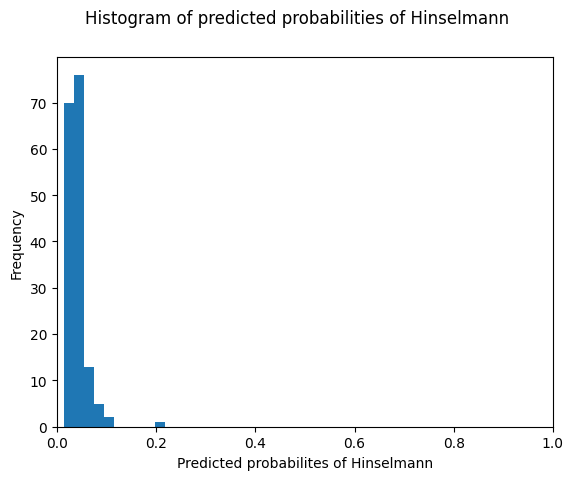

In [122]:
# Plots predicted probabilities to a histogram
y_pred1 = logreg.predict_proba(X_test)[:,1] # using the test variable
plt.hist(y_pred1, bins=10)
plt.suptitle('Histogram of predicted probabilities of Hinselmann')
plt.xlim(0,1)
plt.xlabel('Predicted probabilites of Hinselmann')
plt.ylabel('Frequency')
# The plot is highly skewed to 0,
# which means that the model predicts there a person won't have Hinselmann

Text(0, 0.5, 'Frequency')

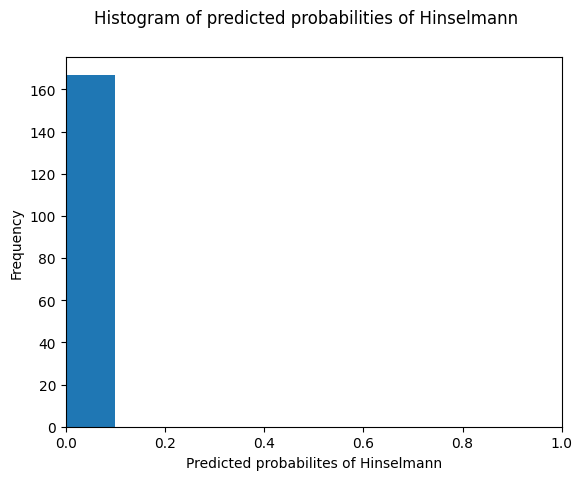

In [124]:
# Using 0.5 threshold
y_pred1 = y_pred1.reshape(-1,1)
y_pred2 = binarize(y_pred1, threshold = 0.5)
plt.hist(y_pred2, bins=10)
plt.suptitle('Histogram of predicted probabilities of Hinselmann')
plt.xlim(0,1)
plt.xlabel('Predicted probabilites of Hinselmann')
plt.ylabel('Frequency')
# With the threshold at 0.5, the plot becomes skewed to 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

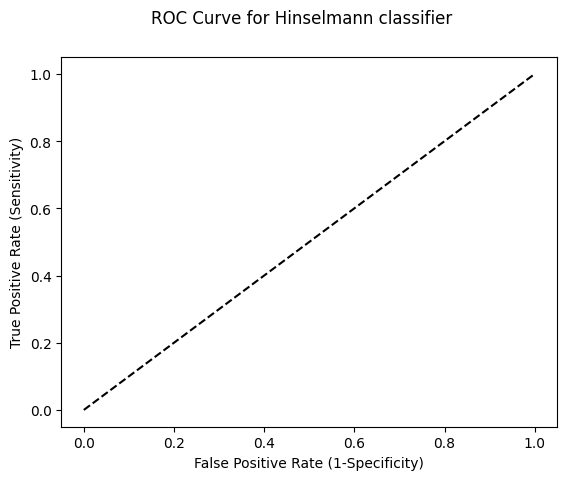

In [128]:
# Creates an ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label = 'Yes') # Using train variables
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.suptitle('ROC Curve for Hinselmann classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
# It seems that there is an error as the false positive is 0

In [130]:
# Gets the ROC AUC score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC: {:.4f}'.format(Cross_validated_ROC_AUC))
# The result is not too high but is still higher than 0.5,
# therefore the model might not predict well

Cross validated ROC AUC: 0.6114


In [131]:
# Gets the 5-Fold Cross Validation score
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy').mean()
print('Cross-validation score: {:.4f}'.format(scores))
# The result is higher than 0.9, which suggest high accuracy

Cross-validation score: 0.9581


In [132]:
# Using GridSearch CV
parameters = [{'penalty':['l1', 'l2']},
              {'C':[1,10,100,1000]}]
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [135]:
# Gets the best model
print('GridSearch CV best score: {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results: \n\n',(grid_search.best_params_))
print('\n\nEstimator that was chosen by the search: \n\n',(grid_search.best_estimator_))

Cross-validation score: 0.9581


Parameters that give the best results: 

 {'penalty': 'l1'}


Estimator that was chosen by the search: 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [136]:
# Gets the GridSearch CV score on test set
print('GridSearch CV score on test set: {:.4f}\n\n'.format(grid_search.score(X_test, y_test)))
# The results are the same as with the normal model

GridSearch CV score on test set: 0.9581


